# Car Prices Prediction using Linear Regression

### The goal of this project is to predict used car prices based on several of its characteristics,
### While also extracting insights about the influence of these characterstics on the car price .

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
plt.style.use("seaborn")

## Loading the used cars dataset based on real sales in 2015

In [3]:
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Cleaning the dataset




#### Dropping some features that will not affect the price

In [4]:
df = df.drop(["state","mmr","trim","vin","saledate","seller"],axis=1)

In [5]:
df=df.replace("—",np.NaN)
df.isnull().sum()

year               0
make               0
model              0
body               0
transmission       0
condition          0
odometer           0
color           2246
interior         988
sellingprice       0
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

year            0.000000
make            0.000000
model           0.000000
body            0.000000
transmission    0.000000
condition       0.000000
odometer        0.000000
color           4.822019
interior        2.121173
sellingprice    0.000000
dtype: float64

#### Filling the missing values with the most popular value

In [7]:
df['color'] = df['color'].fillna(df['color'].mode()[0])


In [8]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

#### Reducing the number of body types to a few main types

In [9]:
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [10]:
df["body"]= df["body"].str.title()

In [11]:
body=["Van","Cab","Sedan","Coupe", "Convertible", "Hatchback", "Suv", "Wagon","Koup","Crew","van","cab","crew"]
keyword = '|'.join(r"{}".format(x) for x in body)

df['body'] = df['body'].str.extract('('+ keyword + ')', expand=False)

In [12]:
df["body"]= df["body"].str.title()

In [13]:
df["body"]= df["body"].replace("Crew","Cab")
df["body"].unique()

array(['Sedan', 'Suv', 'Van', 'Cab', 'Wagon', 'Coupe', 'Convertible',
       'Hatchback', 'Koup'], dtype=object)

In [14]:
df["body"]= df["body"].replace("Koup","Coupe")
df["body"].unique()

array(['Sedan', 'Suv', 'Van', 'Cab', 'Wagon', 'Coupe', 'Convertible',
       'Hatchback'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   body          46578 non-null  object 
 4   transmission  46578 non-null  object 
 5   condition     46578 non-null  float64
 6   odometer      46578 non-null  object 
 7   color         46578 non-null  object 
 8   interior      46578 non-null  object 
 9   sellingprice  46578 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.6+ MB


In [16]:
df["odometer"] = df["odometer"].str.extract('(\d+)',expand=False).astype(int)
df["sellingprice"] = df["sellingprice"].str.extract('(\d+)',expand=False).astype(int)
df

,year,make,model,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,Sedan,automatic,3.9,50404,black,gray,10900
1,2014,Toyota,4Runner,Suv,automatic,4.9,17846,gray,black,29900
2,2012,Lexus,IS 250,Sedan,automatic,4.1,21122,silver,black,24200
3,2002,BMW,X5,Suv,automatic,1.9,145303,black,black,3200
4,2014,Ford,E-Series Van,Van,automatic,4.9,6714,white,gray,22100
...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,Suv,automatic,3.5,52844,black,gray,17000
46574,2012,Infiniti,G Sedan,Sedan,automatic,4.5,23185,black,black,21500
46575,2013,BMW,3 Series,Sedan,automatic,4.2,45357,white,beige,22000
46576,2013,Toyota,Camry,Sedan,automatic,3.5,43376,black,beige,13800


## Exploring the Dataset


Text(137.5, 0.5, 'Selling Count')

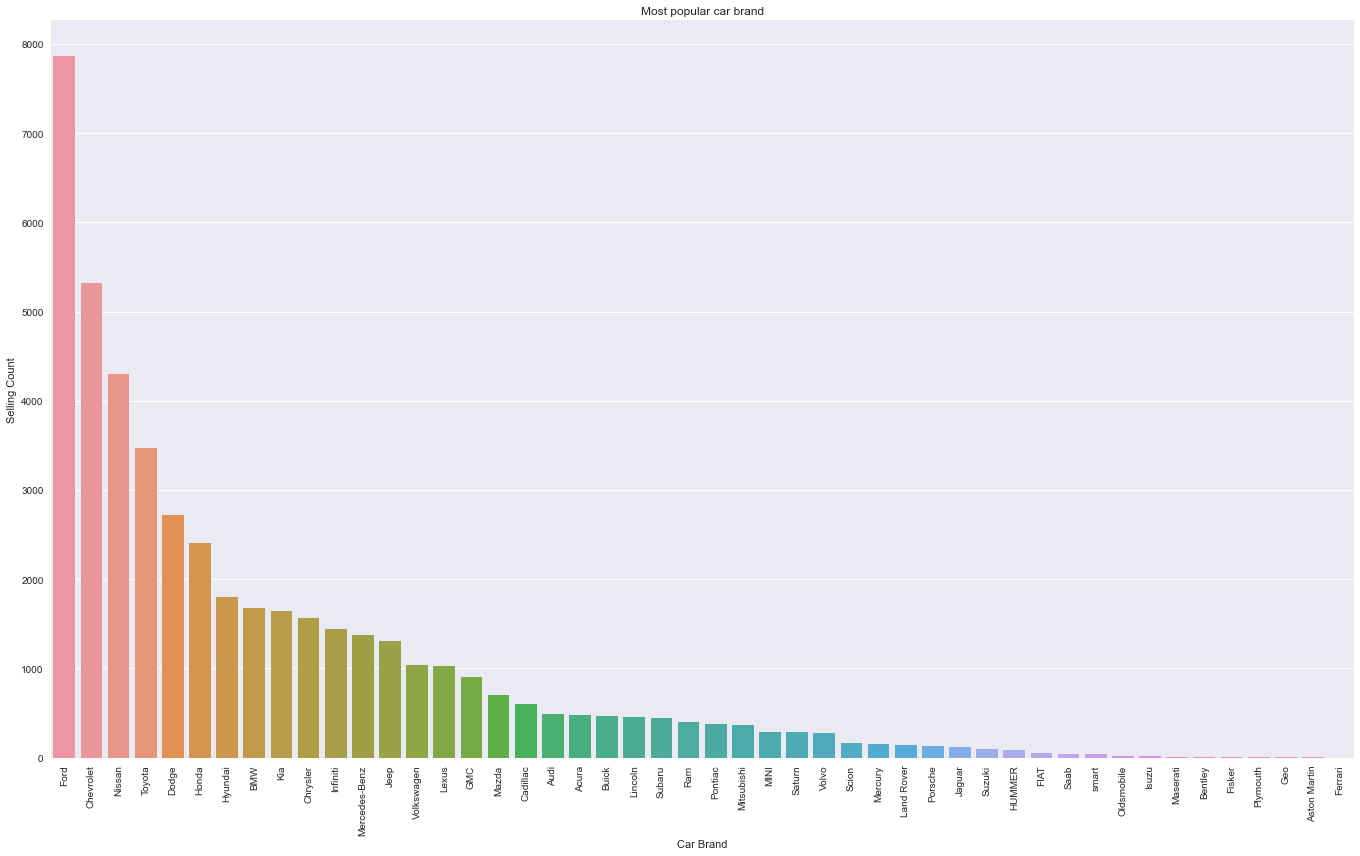

In [17]:
f = plt.figure(figsize=(19,12))
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Car Brand')
plt.ylabel('Selling Count')

**We can see that Ford and Chevrolet are the most common types.**

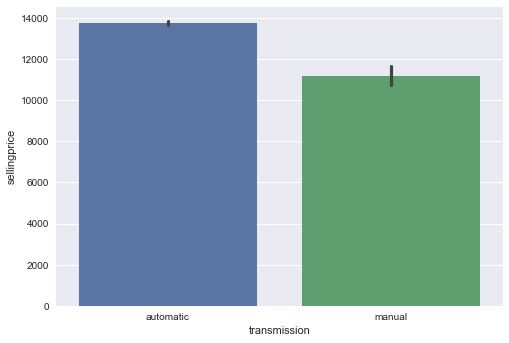

In [18]:
ax= sns.barplot(x="transmission",y="sellingprice",data=df)

**Automatic cars have higher prices than manual cars.**

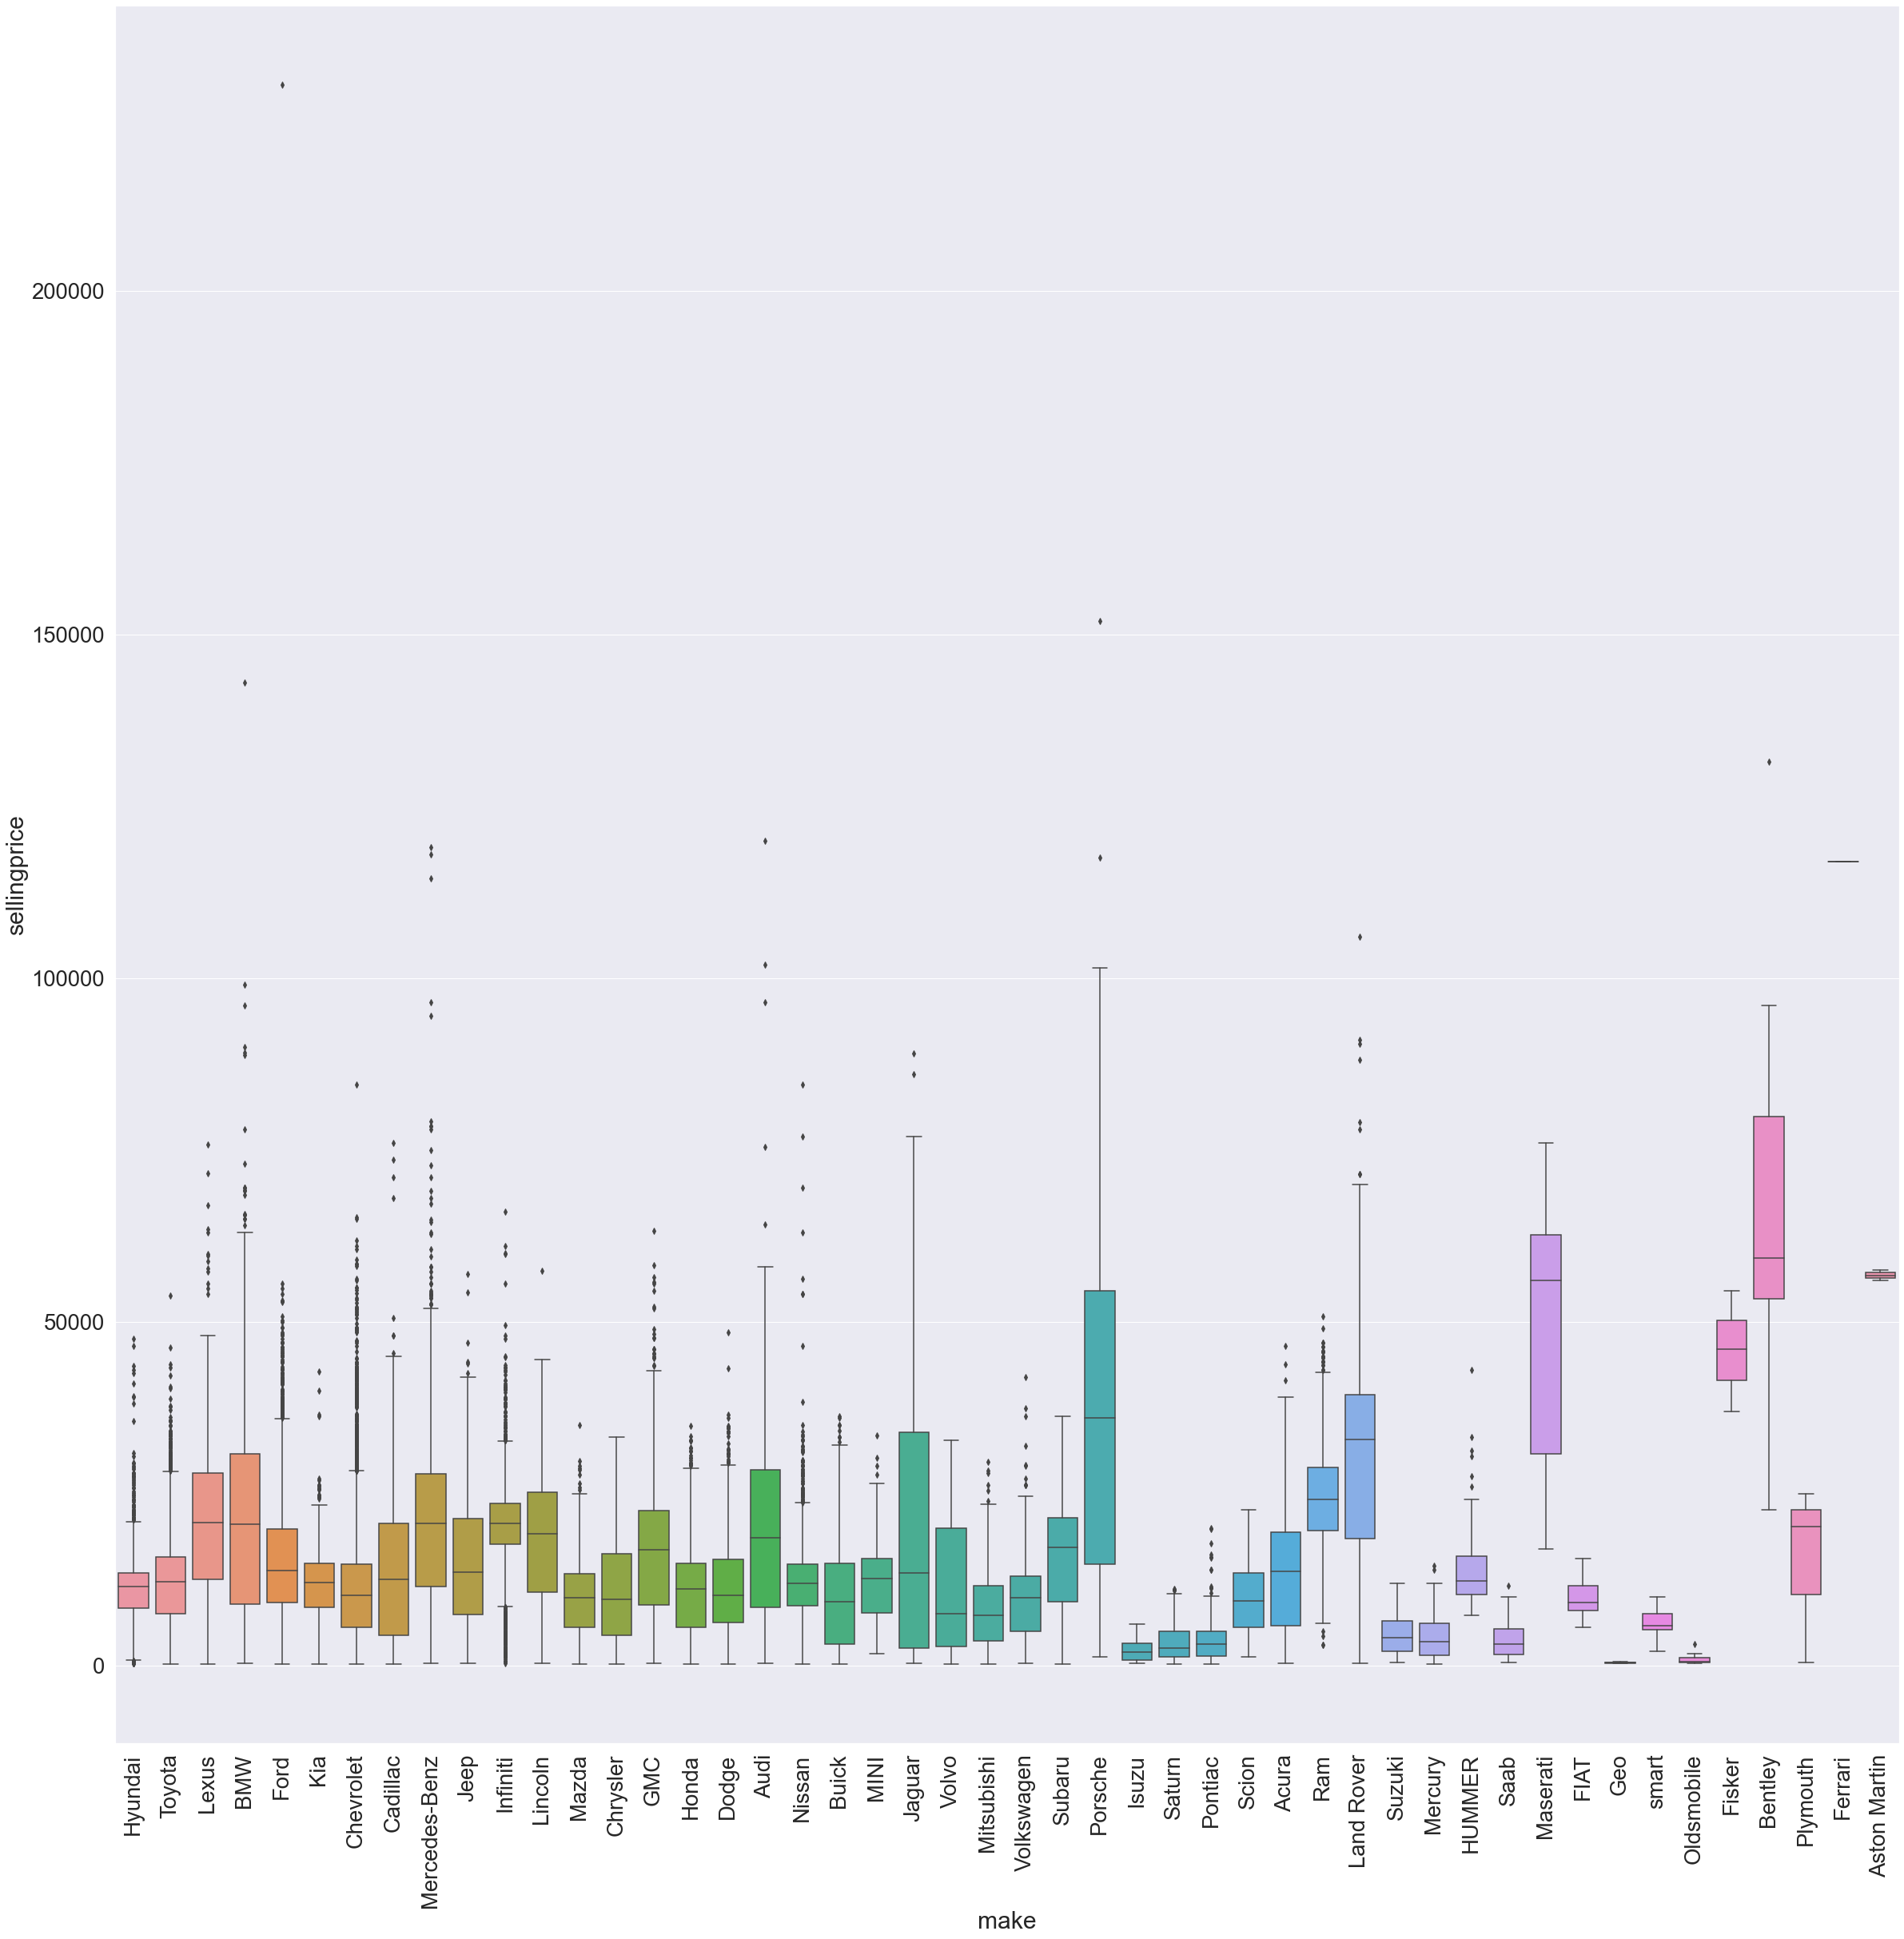

In [19]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,40))
Boxplot= sns.boxplot(x="make", y="sellingprice", data=df)
plt.xticks(rotation=90);

**It appears that Bently, Massarati and Aston Martin are one of the Higher end Brands.**

**While Isuzu, Oldsmobile and Geo are some of the lowest Brands.**

**We can also see that the boxplots of Porche and Maserati are the widest distributed boxes which means they cover a higher range of values.**

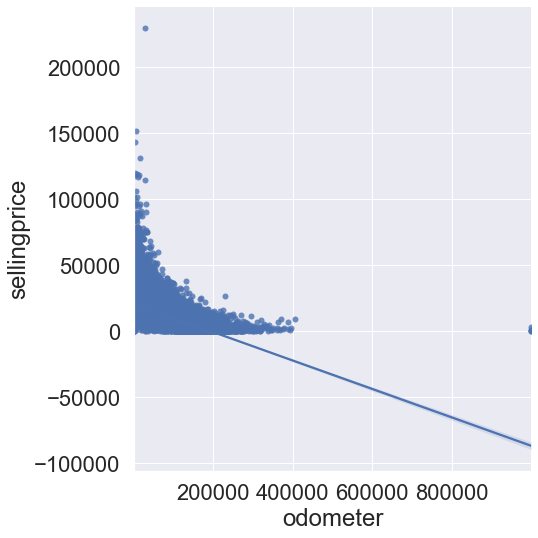

In [20]:
sns.set(font_scale=2)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

#### We can normalize the prices and odometer since the values are high

In [87]:
newdf = df[["odometer","sellingprice"]]

In [88]:
normalized_df=(newdf-newdf.min())/(newdf.max()-newdf.min())
normalized_df

,odometer,sellingprice
0,0.050403,0.046770
1,0.017845,0.129432
2,0.021121,0.104633
3,0.145302,0.013270
4,0.006713,0.095497
...,...,...
46573,0.052843,0.073309
46574,0.023184,0.092887
46575,0.045356,0.095062
46576,0.043375,0.059387


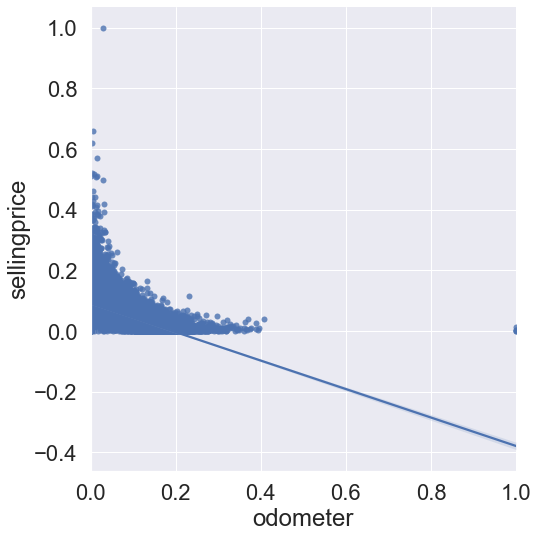

In [89]:
sns.lmplot(x="odometer",y="sellingprice",data=normalized_df,height=8)

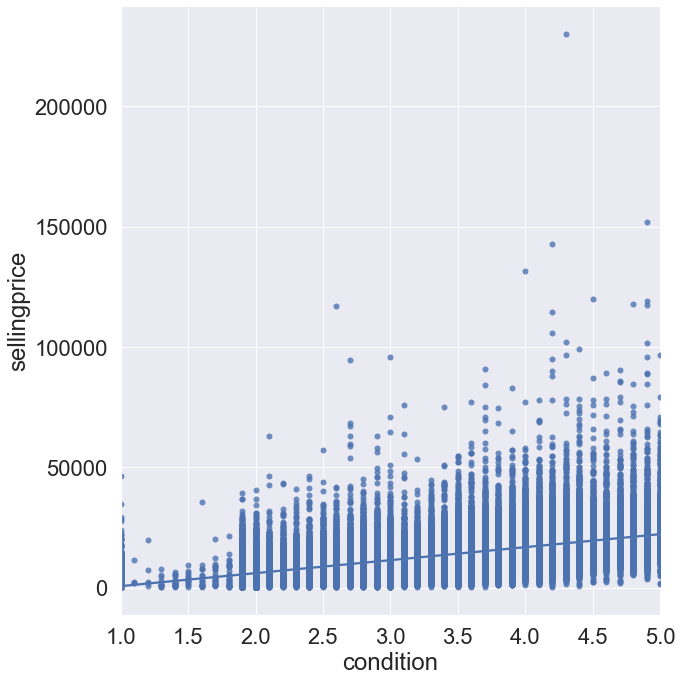

In [90]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=10)

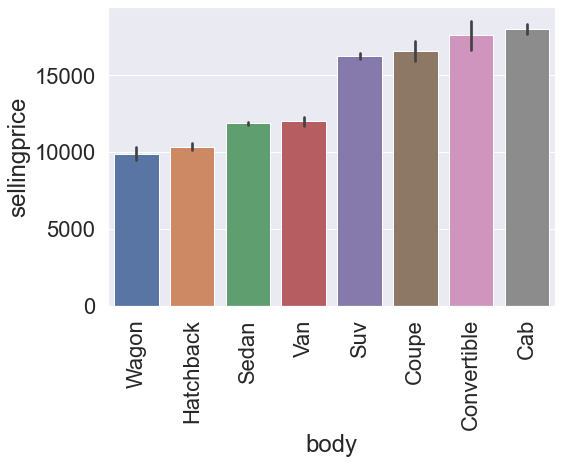

In [91]:
order= df[["body","sellingprice"]].groupby('body').mean().sort_values("sellingprice").index

ax= sns.barplot(x="body",y="sellingprice",data=df,order=order)
plt.xticks(rotation=90);

**From the graph we can see that Cabs and Convertible cars have higher prices.**

### We can drop outliers in order to visualize better

In [92]:
df.drop(df.index[df["odometer"]>800000], inplace = True)

In [93]:
df.drop(df.index[df["sellingprice"]>200000], inplace = True)

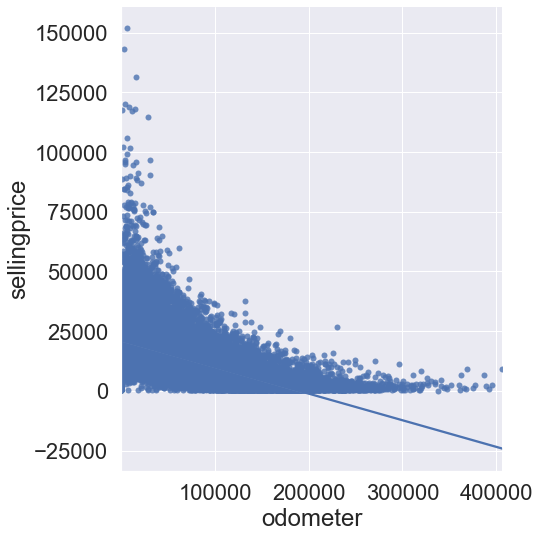

In [94]:
sns.set(font_scale=2)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

**There is a negatice correlation between the odometer and the selling price, this means that the higher the odometer reading in a car the lower its price is.**

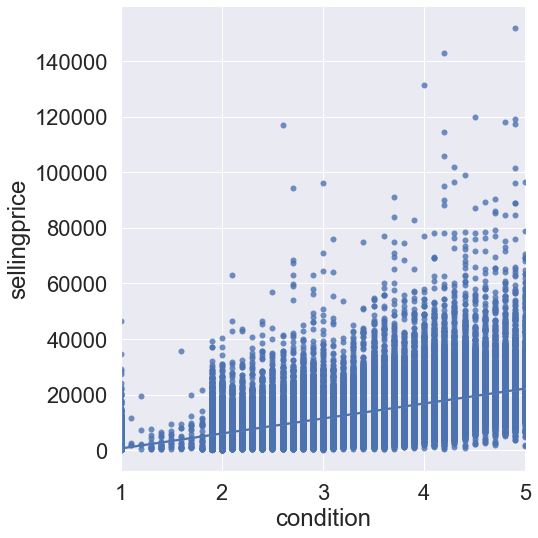

In [95]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=8);

**While the correlation between the condition of the car and its price is positive, the higher the condition the higher the price.**

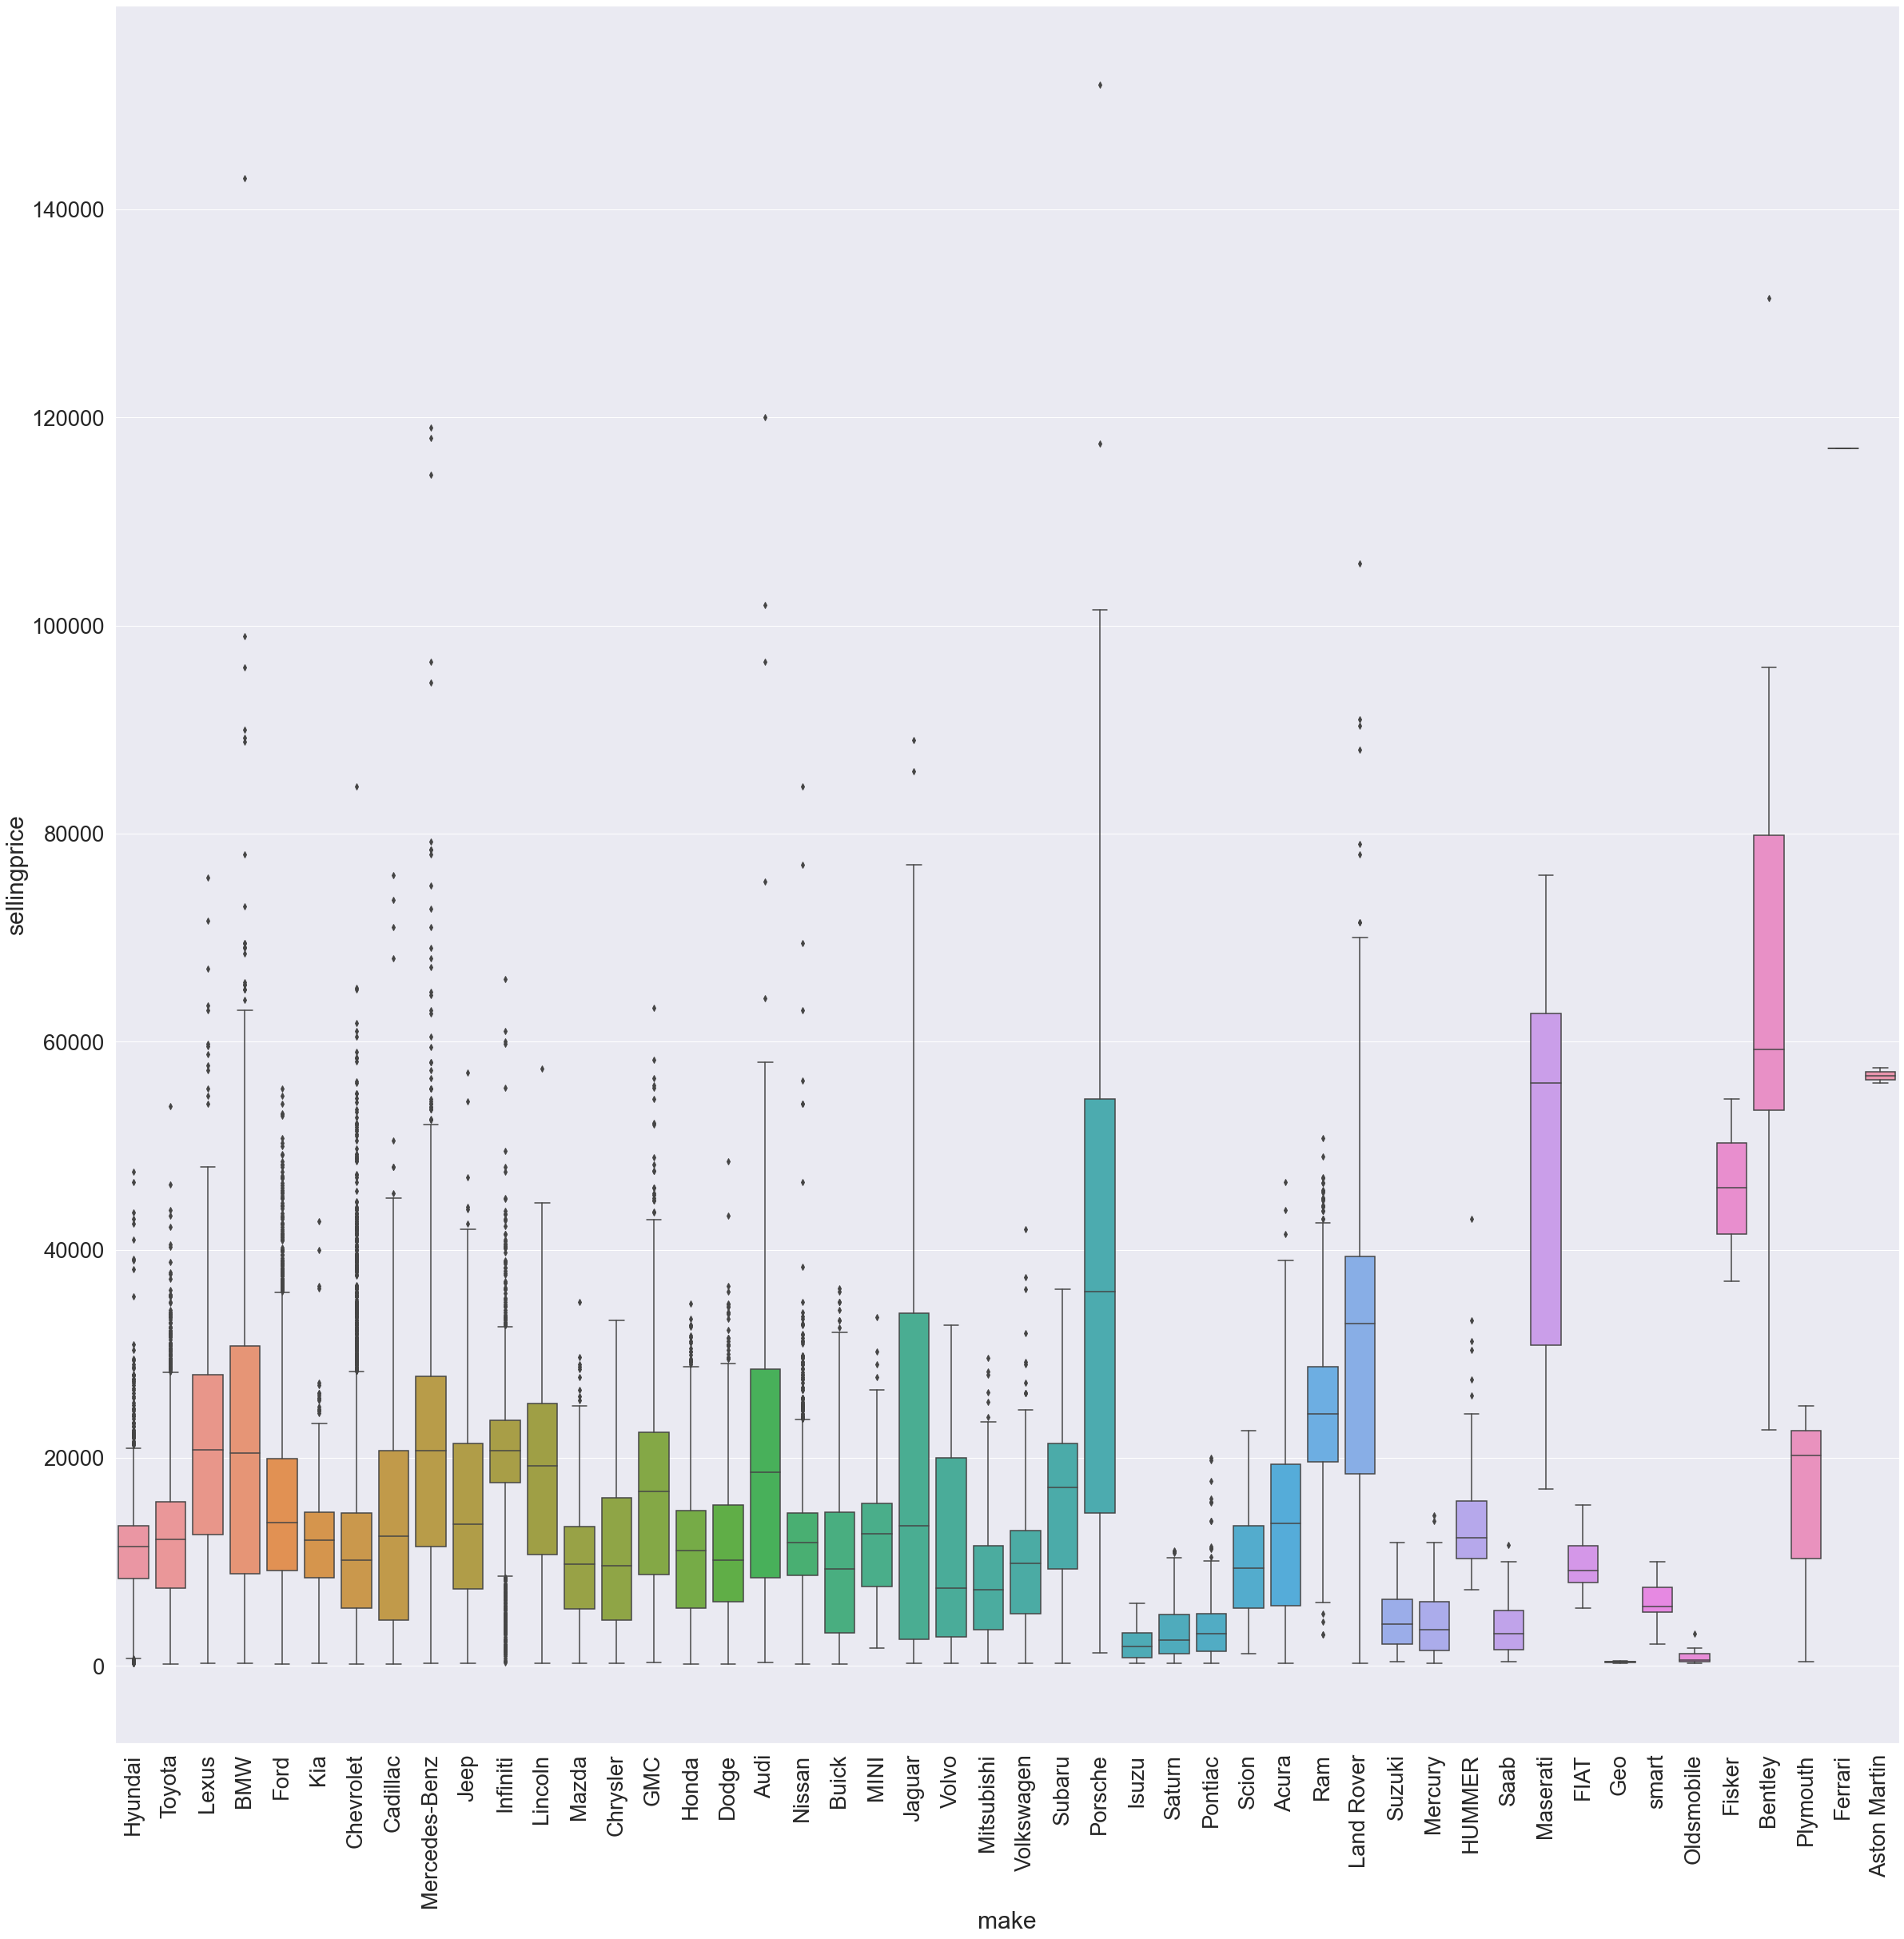

In [96]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,40))
Boxplot= sns.boxplot(x="make", y="sellingprice", data=df)
plt.xticks(rotation=90);

**This is the graph after removing outliers, it stays the same more or less.**

#### Visualizing the correlation of columns with the price.

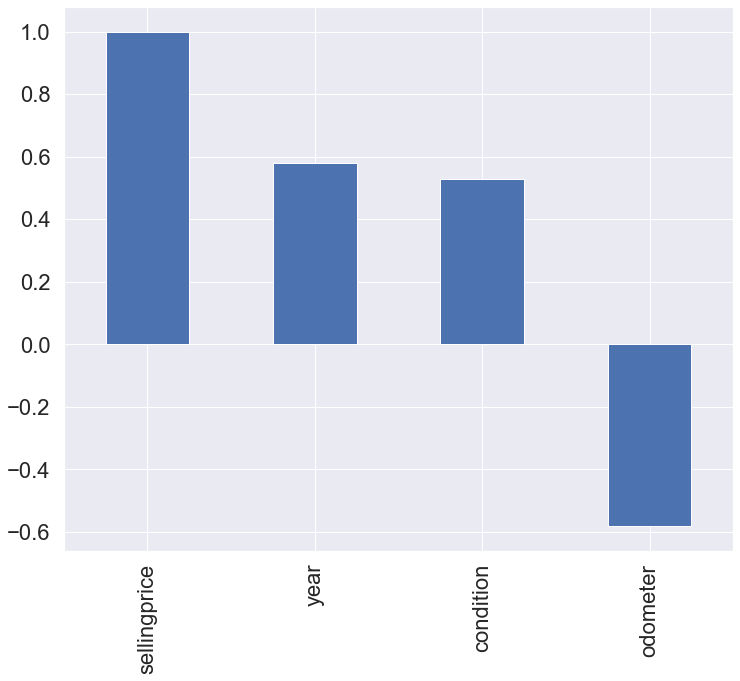

In [22]:
plt.figure(figsize=(12,10))
df.corr()['sellingprice'].sort_values(ascending = False).plot(kind='bar')

**The Year feature also has high positive correlation with the price, which means the higher the car manufacturing year the higher its price.** 

In [97]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'body' 'transmission' 'condition' 'odometer'
 'color' 'interior' 'sellingprice']

Number of rows and columns in the dataset: (46572, 10)


In [98]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

make: ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']

model: ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sierra 1500' 'Cooper' 'XJ' 'Edge' 'Focus' 'Avenger'
 'Civic' 'Escape' 'Camry' 'Encore

### Encoding the data using one hot encoding since there is no ranking in the categorical columns unique values 

In [99]:
df_encodedoh = pd.get_dummies(data=df,
                           columns=df.select_dtypes(object).columns,
                           dtype='int8')
df_encodedoh

,year,condition,odometer,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2013,3.9,50404,10900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303,3200,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714,22100,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,3.5,52844,17000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
46574,2012,4.5,23185,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,2013,4.2,45357,22000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46576,2013,3.5,43376,13800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting the data into testing and training data.**

In [100]:
from sklearn.model_selection import train_test_split

x = df_encodedoh.drop('sellingprice',axis=1) # Independent variable
y = df_encodedoh['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 32600
Testing dataset size: 13972


In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [102]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.060889e+06
1,theta_1,year,1.035893e+03
2,theta_2,condition,1.397609e+03
3,theta_3,odometer,-4.688857e-02
4,theta_4,make_Acura,-2.760806e+03
...,...,...,...
740,theta_740,interior_red,2.424869e+03
741,theta_741,interior_silver,-2.552979e+03
742,theta_742,interior_tan,-1.903759e+03
743,theta_743,interior_white,-1.454141e+03


**Calculating the mean square error and R square values to gain insights on the performance of the model.**

In [103]:
# sklearn regression module
y_pred_sk = lin_reg.predict(x_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  16334888.862744356
R square obtain for scikit learn library is : 0.8266153704694734


**We can see that the accurace of the model is 83% which is very good.**